# Posttest 5

#### import library

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import StandardScaler

In [37]:
film = pd.read_csv('movies.csv')
film

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,NaN
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,NaN
4,Daman,2022,121,NaN,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,NaN,13372,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9844,Welcome to the Jungle,I) (2013,95,Not Rated,"Action, Adventure, Comedy","['Rob Meltzer', 'Jean-Claude Van Damme', 'Adam...","['Jean-Claude Van Damme', 'Adam Brody', 'Rob H...",4.9,25.0,13770,NaN
9845,Boat Trip,2002,94,R,Comedy,"['Mort Nathan', 'Cuba Gooding Jr.', 'Horatio S...","['Cuba Gooding Jr.', 'Horatio Sanz', 'Roselyn ...",4.9,18.0,31972,8.59
9846,Did You Hear About the Morgans?,2009,103,PG-13,"Comedy, Drama, Romance","['Marc Lawrence', 'Hugh Grant', 'Sarah Jessica...","['Hugh Grant', 'Sarah Jessica Parker', 'Sam El...",4.9,27.0,41830,29.58
9847,The Crow: Salvation,2000,102,R,"Action, Crime, Fantasy","['Bharat Nalluri', 'Kirsten Dunst', 'William A...","['Kirsten Dunst', 'William Atherton', 'Debbie ...",4.9,NaN,11938,NaN


In [38]:
film.info() #melihat type data pada dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9849 entries, 0 to 9848
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9849 non-null   object 
 1   year         9849 non-null   object 
 2   runtime      9849 non-null   int64  
 3   certificate  9493 non-null   object 
 4   genre        9849 non-null   object 
 5   director     9849 non-null   object 
 6   stars        9849 non-null   object 
 7   rating       9849 non-null   float64
 8   metascore    7876 non-null   float64
 9   votes        9849 non-null   int64  
 10  gross        7015 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 846.5+ KB


In [39]:
film["gross"].fillna(0, inplace=True) #mengganti type data float menjadi int
film["gross"] = film["gross"].astype("int")

### A. Supervised Learning

##### Linear Regression

In [40]:
X = film[['runtime', 'votes', 'gross']]
y = film['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared Score:', r2)

Mean Absolute Error: 0.5911301667196834
Mean Squared Error: 0.5285503685843699
Root Mean Squared Error: 0.7270146962643671
R-squared Score: 0.21477228051124664


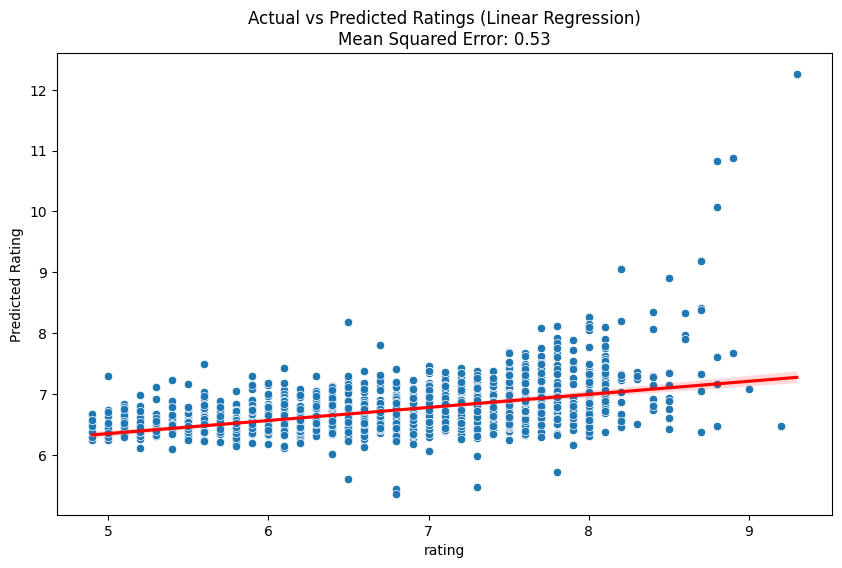

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings (Linear Regression)\nMean Squared Error: {:.2f}'.format(mse))

sns.regplot(x = y_test, y = y_pred, scatter = False, color = 'r')
plt.show()

visualisasi di atas merupakan sebaran data aktual dan prediksi dan garis menunjukkan hubungan antara data aktual dan prediksi

### B. Unsupervised Learning

##### KMeans

In [44]:
km = pd.read_csv('movies.csv')
X = km[['runtime', 'votes', 'gross']]
X

,runtime,votes,gross
0,142,2780534,28.34
1,175,1935895,134.97
2,135,12470,NaN
3,87,42018,NaN
4,121,13372,NaN
...,...,...,...
9844,95,13770,NaN
9845,94,31972,8.59
9846,103,41830,29.58
9847,102,11938,NaN


D:\Nap's Property\Kuliah sms 3\Kecerdasan Buatan\Praktikum\venv_A1_22\navira_010\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


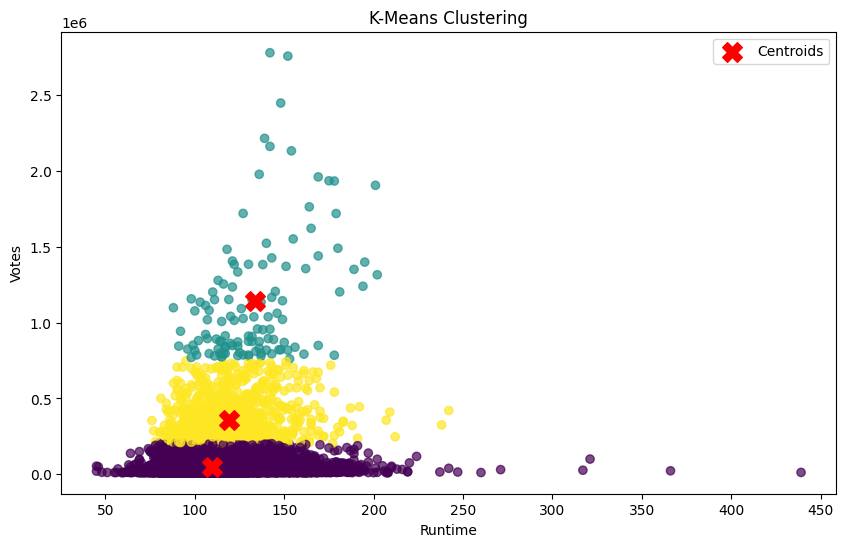

In [45]:
X = film[['runtime', 'votes', 'gross']]

kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X)

labels = kmeans.labels_
film['cluster'] = labels

plt.figure(figsize=(10, 6))
plt.scatter(X['runtime'], X['votes'], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Runtime')
plt.ylabel('Votes')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

#### Cluster yang telah diprediksi, dengan tanpa label asli

In [49]:
ss_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.80
Davies-Bouldin Index: 0.53
Calinski-Harabasz Index: 18555.84


#### Cluster yang telah diprediksi, dengan label asli

In [47]:
cross_tab = pd.crosstab(film["cluster"], film["rating"])
print("Cross-Tabulation: ")
print("")

ari = adjusted_rand_score(film["rating"], kmeans.labels_)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
# Normalized Mutual Information (NMI)
# Konversi nama pada kolom ‘species’ menjadi numerik
true_labels_num = film["rating"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, kmeans.labels_)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
# Fungsi HCV-M
homogeneity = homogeneity_score(film["rating"], kmeans.labels_)
completeness = completeness_score(film["rating"], kmeans.labels_)
v_measure = v_measure_score(film["rating"], kmeans.labels_)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation: 

Adjusted Rand Index (ARI): 0.00
Normalized Mutual Information (NMI): 0.03
Homogeneity Score: 0.01
Completeness Score: 0.13
V-Measure Score: 0.03


D:\Nap's Property\Kuliah sms 3\Kecerdasan Buatan\Praktikum\venv_A1_22\navira_010\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Nap's Property\Kuliah sms 3\Kecerdasan Buatan\Praktikum\venv_A1_22\navira_010\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Nap's Property\Kuliah sms 3\Kecerdasan Buatan\Praktikum\venv_A1_22\navira_010\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Nap's Property\Kuliah sms 3\Kecerdasan Buatan\Praktikum\venv_A1_22\navira_01

D:\Nap's Property\Kuliah sms 3\Kecerdasan Buatan\Praktikum\venv_A1_22\navira_010\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Nap's Property\Kuliah sms 3\Kecerdasan Buatan\Praktikum\venv_A1_22\navira_010\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Nap's Property\Kuliah sms 3\Kecerdasan Buatan\Praktikum\venv_A1_22\navira_010\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
D:\Nap's Property\Kuliah sms 3\Kecerdasan Buatan\Praktikum\venv_A1_22\navira_01

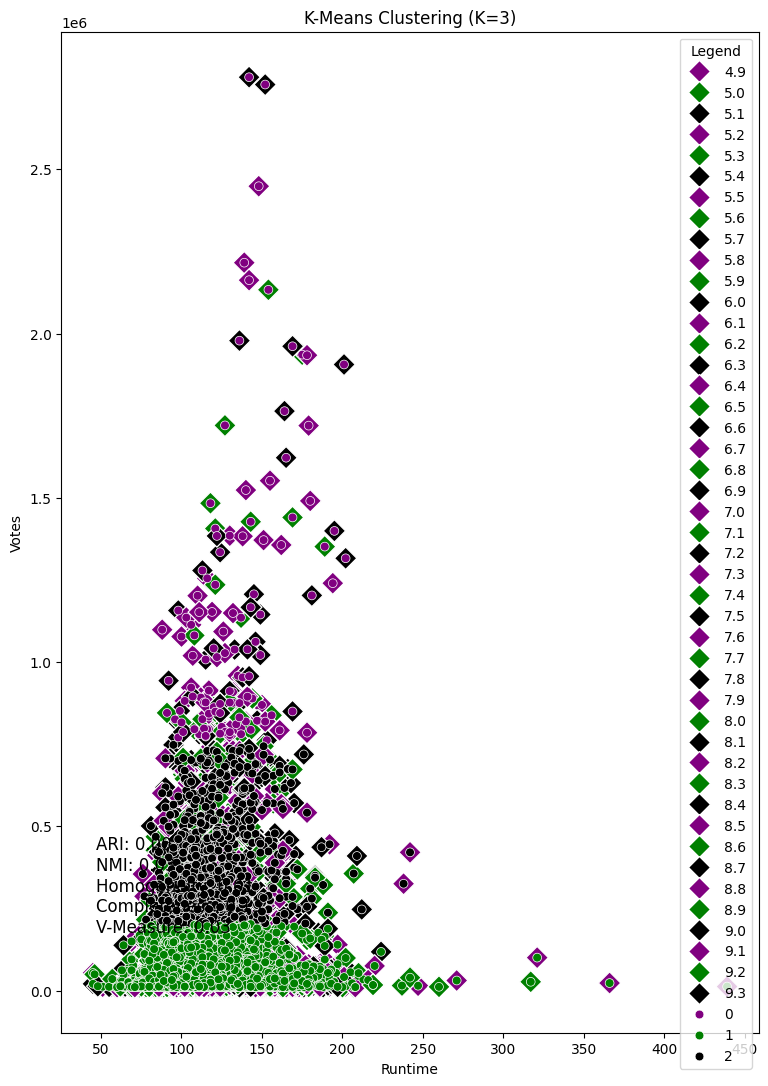

In [57]:
ari = adjusted_rand_score(film["rating"], kmeans.labels_)
nmi = normalized_mutual_info_score(true_labels_num, kmeans.labels_)
homogeneity = homogeneity_score(film["rating"], kmeans.labels_)
completeness = completeness_score(film["rating"], kmeans.labels_)
v_measure = v_measure_score(film["rating"], kmeans.labels_)

cluster_mapping = {0: 1, 1: 0, 2: 2}
film["cluster2"] = film["cluster"].map(cluster_mapping)

plt.figure(figsize = (9, 13))
colors = ["purple", "green", "black"]

sns.scatterplot(data=film, x = "runtime", y = "votes", hue = "rating", palette = colors, marker = "D", s = 130)
sns.scatterplot(data=film, x = "runtime", y = "votes", hue = "cluster2", palette = colors, marker = "o", s = 40)

plt.annotate(f'ARI: {ari:.2f}\nNMI: {nmi:.2f}\nHomogeneity: {homogeneity:.2f}\nCompleteness: {completeness:.2f}\nV-Measure: {v_measure:.2f}',
             xy = (0.05, 0.1), xycoords='axes fraction', fontsize = 12, color = 'black')

plt.title("K-Means Clustering (K=3)")
plt.xlabel("Runtime")
plt.ylabel("Votes")
plt.legend(title="Legend", loc="upper right")
plt.show()
